In [1]:
 import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/tweetdata.csv')

In [4]:
df.shape

(86460, 3)

In [5]:
df.head(
  
)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86460 entries, 0 to 86459
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Party   86460 non-null  object
 1   Handle  86460 non-null  object
 2   Tweet   86460 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [7]:
df.describe()
#df.describe().transpose()



,Party,Handle,Tweet
count,86460,86460,86460
unique,2,433,84502
top,Republican,RepDarrenSoto,"RT @RepDanKildee: Four years later, Flint fami..."
freq,44392,200,31


In [8]:
### Checking Missing values and the percentage for Missing:
totalnull = df.isnull().sum()
count = totalnull.sort_values(ascending=False)
percentage = ((totalnull/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')
missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Party,0,0.0
Handle,0,0.0
Tweet,0,0.0


Republican    44392
Democrat      42068
Name: Party, dtype: int64
Republican    51.34
Democrat      48.66
Name: Party, dtype: float64


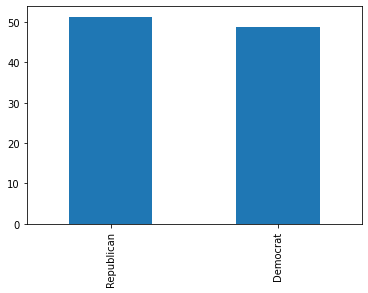

In [9]:
### Checking for the Distribution of Default ###
print(round(df.Party.value_counts())) # value counts gives the frequency of unique values 

print(round(df.Party.value_counts(normalize=True)*100,2))
round(df.Party.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()

In [10]:
#Cleaning 
import re # When you have imported the re module, you can start using regular expressions:
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text= re.sub(  'u"\U0001F600-\U0001F64F"', '', text) # emoticons
    text=   re.sub('u"\U0001F300-\U0001F5FF"', '', text)  # symbols & pictographs
  
      
    return text
  
def text_clean_2(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)



cleaned1 = lambda x: text_clean_2( text_clean_1(x)) # lambda function 
# lambda function is a powerful process when we use them with Python’s built-in functions.

In [11]:
# Let's take a look at the updated text

df['cleaned_tweet'] = pd.DataFrame(df.Tweet.apply(cleaned1))

df.head(10)

,Party,Handle,Tweet,cleaned_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote to savetheinternet prou...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resident alta ...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted that hurrican...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting with repdarrensoto th...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts on june ...
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...,rt emgageactionfl thank you to all who came ou...
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...,hurricane maria left approx billion in damage...
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...,rt tharryry i am delighted that repdarrensoto ...
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...,rt hispaniccaucus trumps antiimmigrant policie...
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...,rt repstephmurphy great joining weareunidosus ...


In [12]:
from sklearn.model_selection import train_test_split

x = df.cleaned_tweet
y = df.Party
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 225)

print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))
y_test.head()


x_train : 77814
x_test  : 8646
y_train : 77814
y_test  : 8646


74606    Republican
11748      Democrat
33237      Democrat
40449      Democrat
41914      Democrat
Name: Party, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver = "lbfgs")

In [14]:
# # importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('vectorizer',tvec), ('classifier',clf1)]) 
# This is a very simple model without optimization. Here we did not add any optimization things.

model.fit(x_train, y_train) # Let’s call fit() method of the pipe object on our training data


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [15]:
predictions = model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions, y_test)

array([[3266,  909],
       [ 931, 3540]])

In [17]:
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.7871848253527642
Precision :  0.7872293788811155
Recall :  0.7871848253527642


In [18]:
# make the categorical to binary
y_numeric, meta_data = pd.factorize(y_test)
pred_numeric, meta_data = pd.factorize(predictions)

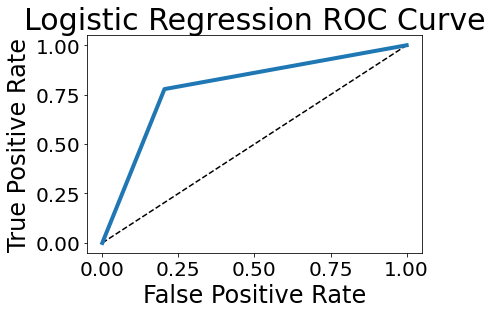

In [19]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric, pred_numeric)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Logistic Regression ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()

In [20]:
# Get the AUC metric:
AUC = roc_auc_score(y_numeric, pred_numeric)
print(AUC)

0.7869296551449346


In [21]:
example = [" i like a well done steak"]
result = model.predict(example)
print(result)

['Republican']


We import the data. We then examine it. Cleaning begins.We remove irrelevant information like emoji's and extra blanks. The data is then partitioned. We maked a single layer perceptron using pipeline.
We use our test sentence and the model beileves our tweet came from a democrat. Just from playing around with the tests our model is not very accurate due to the sample size. Theres only so many words in the tweets and all the words are tied to how politicians use them.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train)
X_train_counts.shape

(77814, 69220)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(77814, 69220)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [25]:
>>> from sklearn.pipeline import Pipeline

>>> text_clf = Pipeline([('vect', CountVectorizer()),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', MultinomialNB()),
... ])
text_clf = text_clf.fit(x_train, y_train)

In [26]:
>>> from sklearn.linear_model import SGDClassifier
>>> text_clf_svm = Pipeline([('vect', CountVectorizer()),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
...                                            alpha=1e-3, random_state=42)),
... ])
>>> _ = text_clf_svm.fit(x_train, y_train)
>>> predictions2 = text_clf_svm.predict(x_test)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
confusion_matrix(predictions2, y_test)

array([[2366,  941],
       [1831, 3508]])

In [28]:
print("Accuracy : ", accuracy_score(predictions2, y_test))
print("Precision : ", precision_score(predictions2, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions2, y_test, average = 'weighted'))

Accuracy :  0.6793893129770993
Precision :  0.7025251742612458
Recall :  0.6793893129770993


In [29]:
# make the categorical to binary
y_numeric2, meta_data = pd.factorize(y_test)
pred_numeric2, meta_data = pd.factorize(predictions2)

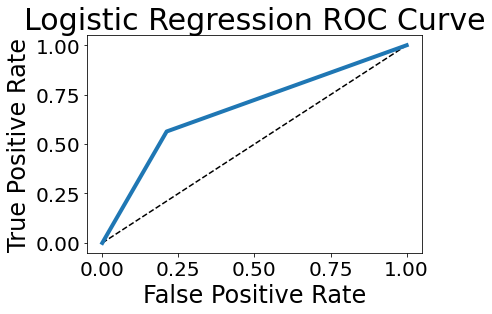

In [30]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_numeric2, pred_numeric2)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Logistic Regression ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()

In [31]:
example = [" i had a great meeting with president biden"]
result = text_clf_svm.predict(example)
print(result)

['Republican']


above is the SVM model. Our false positive rate has increased from the first model. and our true positive rat has down down. SO our model has gotten a little less accurate. This is to be expected since nueral nets are the go to for this kinda of sentiment analysis and the SDGF classifier is a very basic machine. our test now thinks we are republican for meeting with biden. 

FINAL ANALYSIS

Multilayer nueral net is the best model for this type of data by far. THe SVM is the worst. The models could be improved by using more tweet data and by narrowing down types of tweets. 

These types of programs could be used in future elections in a lot of ways. If you expanded the machine to sort for Undecided voters you could scrape every tweet on the internet to pinpoint Undecided voters in battle ground states. You could then spam them with propaganda for a certain party until they start tweeted like a Democrat or a republican. You could also use it to identify memberrs of a specific party in an area. Then bombard them with " get out and vote propaganda" in order to turn a distriict where you are unfavored into a territory that you win. 

Both of these examples would require training the models on data of voters instead of just politicians. 

If you were going to just use the models as is without modifications you could test 3rd party candidate tweets. This would tell you which of the major parties they are trying to draw votes away from. YOu could use this data to deterrmine which 3rd party candidates are the enemy of your enemy and thus give them funding and support.